In [15]:
import numpy as np
import pandas as pd 


In [ ]:
class LogisticSoftmax:
    def __init__(self,input_dim, alpha = 0.001): # alpha is the learnign rate 
        self.w = np.zeros((input_dim, 1))
        self.b = 0 
        self.alpha = alpha 
    
    ## changed sigmoid name to activation, because we are in a neural network architecture style 

    def activation(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # числовая стабильность
        softmax = exp_z / np.sum(exp_z, axis=1, keepdims=True) #np.exp(np.fmin(h, 0)) / (1 + np.exp(-np.abs(h)))
        return softmax
    
    def forward(self,X):
        logit = np.dot(X, self.w) + self.b
        return self.activation(logit)
     
    
    def backward(self, X, y, y_hat):
        m = X.shape[0]
        # using chain rule we compute dl/dw = partial derivative with respect to w , dl/db = partial derivative with respedt to vbias 
        dz = y_hat - y  
        print((X).shape, dz.shape)
        dw = 1/m * np.dot(X.T, dz)
        db = (1 / m) * np.sum(dz, axis=0, keepdims=True) 
        return dw, db
    
    def crossentropy (self, y, y_hat):
        m = y.shape[0]
        epsilon = 1e-15
        y_hat = np.clip(y_hat, epsilon, 1 - epsilon)
        loss = -np.sum(y * np.log(y_hat)) / m
        return loss

    def fit(self, X, y, epochs = 1000):
        ## gradient descent 
        ##  noyt STOCHASTIC GRADIENT DESCENT yet

        for i in range(epochs):
            z = np.dot(X, self.w) + self.b
            y_hat = self.activation(z)
            loss = self.crossentropy(y_hat, y)
            dw, db = self.backward(X, y, y_hat) 
            self.w = self.w - self.alpha * dw 
            self.b = self.b - self.alpha * db 
            
            if i%50:
                print(f"Epoch {i}: loss = {loss}")
    
        

    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        y_hat = self.activation(z)          # 🧠 Мягкое распределение вероятностей
        predictions = np.argmax(y_hat, axis=1)  # 🎯 Берём индекс максимальной вероятности Maybe axis is false! =0?? Look into shape of y_hat / choose correct axis thereof.
        print(y_hat)
        return predictions

In [1]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Фиксируем seed для воспроизводимости
np.random.seed(42)

# Параметры
num_classes = 3
samples_per_class = 100
num_features = 5

# Генерация признаков с небольшим смещением для каждого класса
X = np.vstack([
    np.random.randn(samples_per_class, num_features) + i * 2
    for i in range(num_classes)
])

# Метки классов
labels = np.array([i for i in range(num_classes) for _ in range(samples_per_class)]).reshape(-1, 1)

# One-hot кодирование
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(labels)

# Проверка
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Примеры X:\n", X[:5])
print("Примеры y:\n", y[:5])



X shape: (300, 5)
y shape: (300, 3)
Примеры X:
 [[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337]
 [-0.23413696  1.57921282  0.76743473 -0.46947439  0.54256004]
 [-0.46341769 -0.46572975  0.24196227 -1.91328024 -1.72491783]
 [-0.56228753 -1.01283112  0.31424733 -0.90802408 -1.4123037 ]
 [ 1.46564877 -0.2257763   0.0675282  -1.42474819 -0.54438272]]
Примеры y:
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
list1 = [[2,3,4,'Dog'],
          [4,3,10,'Pig'],
            [5,2,9, 'Cat']]
matr1 = np.array(list1)
print (matr1)


[['2' '3' '4' 'Dog']
 ['4' '3' '10' 'Pig']
 ['5' '2' '9' 'Cat']]


In [ ]:
Feature1 = matr1[:,0]
print(Feature1)
Feature2 = matr1[:,1]
Feature3 = matr1[:,2]


['2' '4' '5']


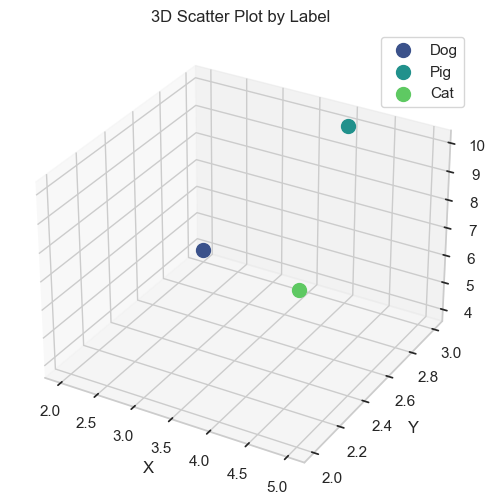

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Исходные данные
data = [['2', '3', '4', 'Dog'],
        ['4', '3', '10', 'Pig'],
        ['5', '2', '9', 'Cat']]

# Создание DataFrame
df = pd.DataFrame(data, columns=['X', 'Y', 'Z', 'Label'])

# Преобразование координат в числовой формат
df[['X', 'Y', 'Z']] = df[['X', 'Y', 'Z']].apply(pd.to_numeric)

# Настройка стиля
sns.set(style='whitegrid')

# Создание 3D-графика
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Цвета для классов
labels = df['Label'].unique()
colors = sns.color_palette('viridis', len(labels))
color_map = dict(zip(labels, colors))

# Отрисовка точек по классам
for label in labels:
    subset = df[df['Label'] == label]
    ax.scatter(subset['X'], subset['Y'], subset['Z'],
               label=label, color=color_map[label], s=100)

# Подписи осей и легенда
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot by Label')
ax.legend()

plt.show()


In [ ]:
h = model.predict(X)

In [ ]:
h.shape , y.shape

Sparsity with L2 penalty: 15.18%
Test score with L2 penalty: 0.8739
Example run in 9.521 s


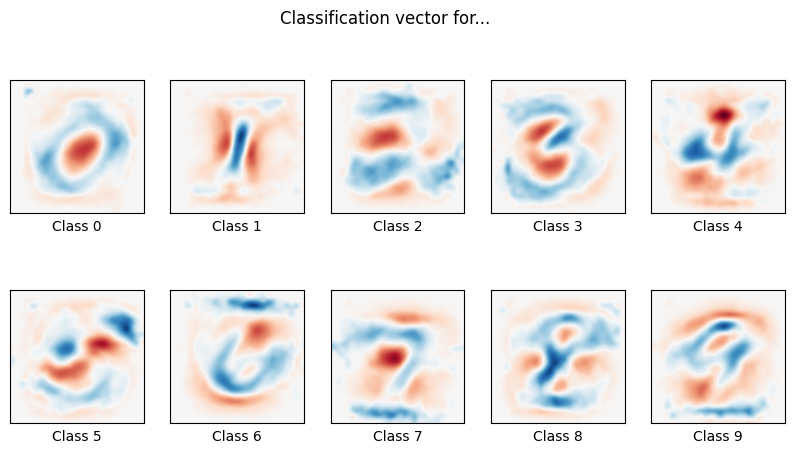

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import time # Added this as original code was giving error

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state


# Author: Arthur Mensch <arthur.mensch@m4x.org>
# License: BSD 3 clause

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(
    C=50. / train_samples, penalty='l2', solver='saga', tol=0.1
)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L2 penalty: %.2f%%" % sparsity)
print("Test score with L2 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    l2_plot.imshow(coef[i].reshape(28, 28), interpolation='spline36',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

run_time = time.time() - t0
print('Example run in %.3f s' % run_time)
plt.show()

In [2]:
f1 = [0.3, 0.5, 0.44, 0.1]
l1 = sum(f1)
print(l1)

f2 = 0
for i in f1:
    f2 += (i*2)



result1 = (f2**0.5)
print(result1)







1.34
1.6370705543744901


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import time # Added this as original code was giving error

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state


# Author: Arthur Mensch <arthur.mensch@m4x.org>
# License: BSD 3 clause

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000


# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

y = y.astype(int) #converting Y values to INTEGER

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model1 = LogisticSoftmax(input_dim=X_train.shape[1])
model1.fit(X_train, y_train, epochs= 30)




(5000, 784) (5000, 5000)
(5000, 784) (5000, 5000)
Epoch 1: loss = 3.259586829811466
(5000, 784) (5000, 5000)
Epoch 2: loss = 3.2449367648047613
(5000, 784) (5000, 5000)
Epoch 3: loss = 3.230325872501074
(5000, 784) (5000, 5000)
Epoch 4: loss = 3.2157542171990046
(5000, 784) (5000, 5000)
Epoch 5: loss = 3.2012218622095805
(5000, 784) (5000, 5000)
Epoch 6: loss = 3.1867288698536282
(5000, 784) (5000, 5000)
Epoch 7: loss = 3.1722753014590905
(5000, 784) (5000, 5000)
Epoch 8: loss = 3.1578612173590286
(5000, 784) (5000, 5000)
Epoch 9: loss = 3.143486676888975
(5000, 784) (5000, 5000)
Epoch 10: loss = 3.129151738384788
(5000, 784) (5000, 5000)
Epoch 11: loss = 3.114856459180356
(5000, 784) (5000, 5000)
Epoch 12: loss = 3.100600895605956
(5000, 784) (5000, 5000)
Epoch 13: loss = 3.0863851029853104
(5000, 784) (5000, 5000)
Epoch 14: loss = 3.072209135634543
(5000, 784) (5000, 5000)
Epoch 15: loss = 3.0580730468597723
(5000, 784) (5000, 5000)
Epoch 16: loss = 3.0439768889554792
(5000, 784) (50

In [ ]:
yhat = model1.predict(X_test)

compare = pd.DataFrame(yhat, y_test)
compare
# increase epochs, alpha, THINK WHY LIFE IS COMPLICATED!, 

[[0.00022811 0.00020848 0.00021483 ... 0.00017414 0.00017944 0.0001849 ]
 [0.00022811 0.00020848 0.00021483 ... 0.00017414 0.00017944 0.0001849 ]
 [0.00022811 0.00020848 0.00021483 ... 0.00017414 0.00017944 0.0001849 ]
 ...
 [0.00022811 0.00020848 0.00021483 ... 0.00017414 0.00017944 0.0001849 ]
 [0.00022811 0.00020848 0.00021483 ... 0.00017414 0.00017944 0.0001849 ]
 [0.00022811 0.00020848 0.00021483 ... 0.00017414 0.00017944 0.0001849 ]]


,0
1,0
9,0
9,0
5,0
1,0
...,...
9,0
1,0
6,0
7,0


In [9]:
y_train.dtype, X_train.dtype

(dtype('O'), dtype('float64'))

In [ ]:
y = = ser.astype(int)

array(['1', '7', '0', ..., '4', '1', '1'], dtype=object)